# Kruskal's algorithm

## Libraries import

In [1]:
import json                       # Read and write files in json
import numpy as np                # Matrix operations
import networkx as nx             # Graph operation and display
from pprint import pprint         # Pretty printing of matrices
import matplotlib.pyplot as plt   # Plot figures

## Settings

In [2]:
file_path = "test_graph.json"

In [3]:
# Display settings
figure_size = (5,5)            # (x,y) expressed in inches
node_color = "#89b2f4"         # Color of the nodes of the graph in the #RRBBGG format
mst_edges_color = "#FF0000"    # Color of the edges that form the MST
default_edge_colour = "#000000"# Clour of the edges that don't belong to the MST

## Load the graph

In [4]:
with open(file_path,"r") as f:
    graph = json.load(f)
pprint(graph)

[[[1, 0.901], [2, 0.464], [3, 0.197]],
 [[0, 0.901], [2, 0.416], [4, 0.94], [5, 0.665]],
 [[0, 0.464], [1, 0.416], [3, 0.05], [6, 0.224]],
 [[0, 0.197], [2, 0.05], [4, 0.57], [6, 0.028]],
 [[1, 0.94], [3, 0.57], [5, 0.898], [6, 0.931]],
 [[1, 0.665], [4, 0.898]],
 [[2, 0.224], [3, 0.028], [4, 0.931]]]


In [5]:
n_of_vertices = len(graph)

In [6]:
# Convert the graph in a list of triples in the form (start, end, weight)
graph = [(start ,*v)  for start, value in enumerate(graph) for v in value]
pprint(graph)

[(0, 1, 0.901),
 (0, 2, 0.464),
 (0, 3, 0.197),
 (1, 0, 0.901),
 (1, 2, 0.416),
 (1, 4, 0.94),
 (1, 5, 0.665),
 (2, 0, 0.464),
 (2, 1, 0.416),
 (2, 3, 0.05),
 (2, 6, 0.224),
 (3, 0, 0.197),
 (3, 2, 0.05),
 (3, 4, 0.57),
 (3, 6, 0.028),
 (4, 1, 0.94),
 (4, 3, 0.57),
 (4, 5, 0.898),
 (4, 6, 0.931),
 (5, 1, 0.665),
 (5, 4, 0.898),
 (6, 2, 0.224),
 (6, 3, 0.028),
 (6, 4, 0.931)]


# Kruskal without graph transformation

In [7]:
def find_minimum_outgoing_edge():
    """Function to be rewritten in quantum form for speed up"""
    outgoing_edges = [edge for edge in graph if edge[0] not in Nodes_visited or edge[1] not in Nodes_visited]
    return min(outgoing_edges, key=lambda x: x[2])

In [8]:
# Set of nodes already inside the MST
Nodes_visited = set([])
# Set of edges of the MST
MST_edges = []

# For each edge in the graph
for i in range(n_of_vertices-1):
    edge = find_minimum_outgoing_edge()
    start, end, weight = edge 
    MST_edges.append(edge)
    Nodes_visited.add(start)
    Nodes_visited.add(end)
        
# Print the results
pprint(MST_edges)

[(3, 6, 0.028),
 (2, 3, 0.05),
 (0, 3, 0.197),
 (1, 2, 0.416),
 (3, 4, 0.57),
 (1, 5, 0.665)]


# Kruskal with graph transformation

### Transform the graph into a convininet rappresentation
Rappresent the graph as an list of triples sorted on the weight. This can be done more efficently with an heap but since sorting is a $O(n \log{(n)})$ and an heap has $O(\log{(n)})$ insertion the complexity of creating the heap is also $O(n \log{(n)})$ so this should be enough.

In [9]:
# Sort it ascending on the weight
graph.sort(key=lambda x: x[2])
pprint(graph)

[(3, 6, 0.028),
 (6, 3, 0.028),
 (2, 3, 0.05),
 (3, 2, 0.05),
 (0, 3, 0.197),
 (3, 0, 0.197),
 (2, 6, 0.224),
 (6, 2, 0.224),
 (1, 2, 0.416),
 (2, 1, 0.416),
 (0, 2, 0.464),
 (2, 0, 0.464),
 (3, 4, 0.57),
 (4, 3, 0.57),
 (1, 5, 0.665),
 (5, 1, 0.665),
 (4, 5, 0.898),
 (5, 4, 0.898),
 (0, 1, 0.901),
 (1, 0, 0.901),
 (4, 6, 0.931),
 (6, 4, 0.931),
 (1, 4, 0.94),
 (4, 1, 0.94)]


### the algorithm

In [10]:
def is_outgoing(edge):
    """Function to be rewritten in quantum form for speed up"""
    start, end, weight = edge 
    return start not in Nodes_visited or end not in Nodes_visited

In [11]:
# Set of nodes already inside the MST
Nodes_visited = set([])
# Set of edges of the MST
MST_edges = []

# For each edge in the graph
for edge in graph:
    # If the algorithm visited all the nodes then it's done 
    if len(Nodes_visited) == n_of_vertices:
        break
    start, end, weight = edge 
    # if the edge will add at least one node add it
    if is_outgoing(edge):
        MST_edges.append(edge)
        Nodes_visited.add(start)
        Nodes_visited.add(end)
        
# Print the results
pprint(MST_edges)

[(3, 6, 0.028),
 (2, 3, 0.05),
 (0, 3, 0.197),
 (1, 2, 0.416),
 (3, 4, 0.57),
 (1, 5, 0.665)]


# Display the result

/home/zommiommy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


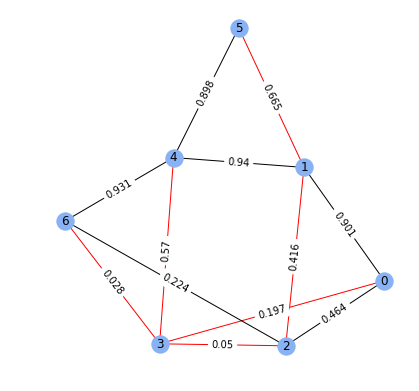

In [12]:
# Create an empty graph
g = nx.Graph()

# add all the vertecies to the graph
for i in range(n_of_vertices):
    g.add_node(i)

# Add all the edges to the graph
for start,end,weight in graph:
    g.add_edge(start,end,weight=weight)
        
for start,end,weight in MST_edges:
    g.add_edge(start,end,weight=weight,color=mst_edges_color)
    
# Display the Graph
# Create and set the dimension of the final image
plt.figure(figsize=figure_size)
# Calculate the spatial disposition of the nodes using the spring algorithm
pos = nx.spring_layout(g)
# Get the colours of the modified edges
colour_dict = nx.get_edge_attributes(g,"color")
# Calculate the colour of the edges
e_color = [ colour_dict.get(edge,default_edge_colour) for edge in g.edges()]
# Draw the graph
nx.draw(g,pos, with_labels=True,node_color=node_color,edge_color=e_color)
# Draw the weight labels over the edges
nx.draw_networkx_edge_labels(g,pos,edge_labels=nx.get_edge_attributes(g,"weight"))
# Show the result
plt.show()